In [1]:
import requests
import json
from Bio import SeqIO
import os
import time
os.chdir("/biodata/franco/zsuzsa_lab/jupyter")

# Read the file disprot_OK_fullset.fasta and get all the identifiers
identifiers = []
#for record in SeqIO.parse("../disprot_OK_fullset_12_2023.fasta", "fasta"):
for record in SeqIO.parse("/biodata/franco/datasets/disprot/disprot_OK_fullset_2023_12.fasta", "fasta"):
    identifiers.append(record.id)

exists_counter = 0
download_counter = 0
output_dir = "mobidb_dev_10_2024"
# Get the mobidb data for each identifier
failed_uniprots = []
os.makedirs(output_dir, exist_ok=True)
for uniprot_id in identifiers:
    url = f"https://mobidb.org/api/download?format=json&acc={uniprot_id}"
    #url = f"https://dev.mobidb.org/api/download?format=json&acc={uniprot_id}"
    if not os.path.exists(f"{output_dir}/{uniprot_id}.json"):
        # use a try-except block to catch exceptions
        download_counter += 1
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                # save the data to a file
                with open(f"{output_dir}/{uniprot_id}.json", "w") as f:
                    json.dump(data, f)
            else:
                print(f"{uniprot_id} failed with status code:", response.status_code)
                failed_uniprots.append(uniprot_id)
        except Exception as e:
            print(f"{uniprot_id} failed with exception:", e)
            failed_uniprots.append(uniprot_id)
        time.sleep(0.5)
    else:
        exists_counter += 1
print(f"Existing files: {exists_counter}")
print(f"To download: {download_counter}")

# Existing files: 2089
# To download: 433


Q8PMB6 failed with exception: Expecting value: line 1 column 1 (char 0)
A0A3N4AZ09 failed with exception: Expecting value: line 1 column 1 (char 0)
A0A0F7RL08 failed with exception: Expecting value: line 1 column 1 (char 0)
M0Y2D5 failed with exception: Expecting value: line 1 column 1 (char 0)
A0A1L8HX71 failed with exception: Expecting value: line 1 column 1 (char 0)
A0A256WXF2 failed with exception: Expecting value: line 1 column 1 (char 0)
A0A5P2U9X4 failed with exception: Expecting value: line 1 column 1 (char 0)
E9BNI3 failed with exception: Expecting value: line 1 column 1 (char 0)
C4IN70 failed with exception: Expecting value: line 1 column 1 (char 0)
C4IN68 failed with exception: Expecting value: line 1 column 1 (char 0)
C4IN69 failed with exception: Expecting value: line 1 column 1 (char 0)
Existing files: 2511
To download: 11


In [ ]:
import numpy as np
from tqdm import tqdm

mobifiles = os.listdir("mobidb_dev_10_2024")

os.makedirs("mobidb_dev_10_2024/PDB_data", exist_ok=True)

stats_dict = dict()

failed_pdbs = []

for i, mobifile in tqdm(enumerate(mobifiles)):

    if not mobifile.endswith("json"):
        continue
    uniprot_id = mobifile.split(".")[0]
    #read json
    with open(f"mobidb_dev_10_2024/{mobifile}") as f:
        data = json.load(f)
    
    for k in data.keys():
        if k.startswith("derived-observed-mobi-"):
            #print(k)
            for l in data[k].keys():
                #print(l, data[k][l])
                if l == "source_id":
                    pdbid, chain = data[k][l].split("_")

                    pdb_output_json = f"mobidb_dev_10_2024/PDB_data/{pdbid}_{chain}.json"

                    if not os.path.exists(pdb_output_json):
                        #print(pdbid, chain)
                        res = requests.get(f"https://data.rcsb.org/rest/v1/core/polymer_entity_instance/{pdbid.upper()}/{chain}")
                    
                        if res.status_code == 200:
                            #datadict = json.loads(res.content.decode())  # same as below
                            datadict = res.json()
                            with open(pdb_output_json, "w") as f:
                                json.dump(datadict, f)

                            #data = response.json()
                        else:
                            print(f"{pdbid}_{chain} failed with status code:", res.status_code)
                            failed_pdbs.append(f"{pdbid}_{chain}")

11it [00:00, 109.21it/s]

7qe7_P failed with status code: 404
7qe7_S failed with status code: 404
8s4g_P failed with status code: 404


41it [00:03, 12.73it/s] 

8s4g_S failed with status code: 404


233it [00:04, 108.27it/s]

7qe7_M failed with status code: 404
7qe7_N failed with status code: 404
8s4g_M failed with status code: 404
8s4g_N failed with status code: 404


377it [00:07, 100.49it/s]

7qe7_F failed with status code: 404


404it [00:09, 38.63it/s] 

8s4g_F failed with status code: 404


504it [00:10, 84.43it/s]

7tpq_A failed with status code: 404


527it [00:11, 33.89it/s]

7tpq_D failed with status code: 404


1159it [48:15, 12.86s/it] 

7qe7_Q failed with status code: 404
7qe7_R failed with status code: 404
8s4g_Q failed with status code: 404
8s4g_R failed with status code: 404


1279it [1:26:59,  8.41s/it] 

7qe7_L failed with status code: 404
8s4g_L failed with status code: 404


1369it [1:45:18,  8.90s/it]

7qe7_G failed with status code: 404


1370it [1:45:25,  8.22s/it]

8s4g_G failed with status code: 404


1379it [1:47:17, 10.75s/it]

7qe7_D failed with status code: 404
8s4g_D failed with status code: 404


1430it [1:53:52, 12.62s/it]

7qe7_H failed with status code: 404
7qe7_O failed with status code: 404
8s4g_H failed with status code: 404
8s4g_O failed with status code: 404


1506it [2:16:04, 19.25s/it] 

In [6]:
uniprot_id = "P35638"
output_dir = "/biodata/franco/zsuzsa_lab/jupyter/mobidb_dev_10_2024/temp"
url = f"https://mobidb.org/api/download?format=json&acc={uniprot_id}"
if not os.path.exists(f"{output_dir}/{uniprot_id}.json"):
    # use a try-except block to catch exceptions
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            # save the data to a file
            with open(f"{output_dir}/{uniprot_id}.json", "w") as f:
                json.dump(data, f)
        else:
            print(f"{uniprot_id} failed with status code:", response.status_code)
            failed_uniprots.append(uniprot_id)
    except Exception as e:
        print(f"{uniprot_id} failed with exception:", e)
        failed_uniprots.append(uniprot_id)
    time.sleep(0.5)

In [21]:
### Compare dictionary for previous and dev annotations of this protein..


with open(f"mobidb/{uniprot_id}.json") as f:
    data_old = json.load(f)

with open(f"mobidb_dev_10_2024/temp/{uniprot_id}.json") as f:
    data_new = json.load(f)

with open(f"mobidb_dev_10_2024/{uniprot_id}.json") as f:
    data_dev = json.load(f)

keys_1 = set(sorted([k for k in data_old.keys()]))
keys_2 = set(sorted([k for k in data_new.keys()]))
keys_3 = set(sorted([k for k in data_dev.keys()]))

joint = set.union(keys_1, keys_2, keys_3)
list_equals = []
list_olds = []
list_k = []
for k in joint:
    if k in data_old:
        old_dict = data_old[k]
    else:
        old_dict = None
        print(f"old_dict: {k} NONE")
    if k in data_new:
        new_dict = data_new[k]
    else:
        print(f"new_dict: {k} NONE")
        new_dict = None
    if k in data_dev:
        dev_dict = data_dev[k]
    else:
        dev_dict = None
        print(f"dev_dict: {k} NONE")
    #print(old_dict == new_dict)
    list_equals.append(new_dict == dev_dict)
    list_olds.append(new_dict == old_dict)
    list_k.append(k)

new_dict: prediction-low_complexity-merge NONE
dev_dict: prediction-low_complexity-merge NONE
old_dict: level NONE
new_dict: prediction-rigidity-dynamine NONE
dev_dict: prediction-rigidity-dynamine NONE
old_dict: homology-msa_conservation NONE
new_dict: prediction-disorder-vsl NONE
dev_dict: prediction-disorder-vsl NONE
new_dict: prediction-coil-fess NONE
dev_dict: prediction-coil-fess NONE
new_dict: prediction-low_complexity-pfilt NONE
dev_dict: prediction-low_complexity-pfilt NONE
old_dict: curated-phase_separation-merge NONE
new_dict: prediction-sheet-fess NONE
dev_dict: prediction-sheet-fess NONE
old_dict: curated-phase_separation-priority NONE
new_dict: prediction-helix-fess NONE
dev_dict: prediction-helix-fess NONE
old_dict: curated-phase_separation-phasepdb NONE
old_dict: _id NONE
new_dict: _id NONE


In [23]:
for i in range(len(list_equals)):
    print(i, list_k[i], list_equals[i], list_olds[i])

0 prediction-low_complexity-merge True False
1 level True False
2 acc True True
3 processing True True
4 proteome True True
5 prediction-rigidity-dynamine True False
6 homology-msa_conservation True False
7 msa_consensus True False
8 homology-msa_occupancy-psiblast True False
9 uniref50 True True
10 prediction-disorder-vsl True False
11 name True True
12 prediction-disorder-espX True True
13 prediction-plddt-alphafold True True
14 prediction-disorder-dis465 True True
15 uniref100 True True
16 prediction-disorder-espD True True
17 prediction-coil-fess True False
18 prediction-disorder-espN True True
19 prediction-low_complexity-pfilt True False
20 curated-phase_separation-merge True False
21 uniparc True True
22 homology-msa_information_content-psiblast True False
23 homology-msa_entropy-psiblast True False
24 localization True True
25 prediction-polyampholyte-mobidb_lite_sub True True
26 uniref90 True True
27 prediction-disorder-glo True True
28 reviewed True True
29 prediction-sheet-f

curated-disorder-disprot {'source_id': 'DP00071', 'regions': [[1, 156]], 'content_fraction': 0.419, 'content_count': 156}
curated-disorder-merge {'regions': [[1, 156]], 'content_fraction': 0.419, 'content_count': 156}
prediction-disorder-priority {'regions': [[157, 160], [228, 372]], 'content_fraction': 0.401, 'content_count': 149}
curated-disorder-priority {'regions': [[1, 156]], 'content_fraction': 0.419, 'content_count': 156}
prediction-low_complexity-merge {'regions': [[39, 69], [133, 147], [224, 254], [273, 323], [346, 356]], 'content_count': 139, 'content_fraction': 0.374}
prediction-disorder-alphafold {'scores': [0.837, 0.826, 0.832, 0.829, 0.824, 0.825, 0.818, 0.815, 0.804, 0.801, 0.798, 0.786, 0.788, 0.785, 0.789, 0.787, 0.797, 0.797, 0.799, 0.801, 0.796, 0.812, 0.812, 0.816, 0.831, 0.843, 0.86, 0.87, 0.879, 0.885, 0.894, 0.9, 0.905, 0.917, 0.917, 0.925, 0.938, 0.94, 0.94, 0.936, 0.936, 0.926, 0.918, 0.918, 0.913, 0.92, 0.911, 0.91, 0.907, 0.908, 0.906, 0.91, 0.915, 0.911, 0.9

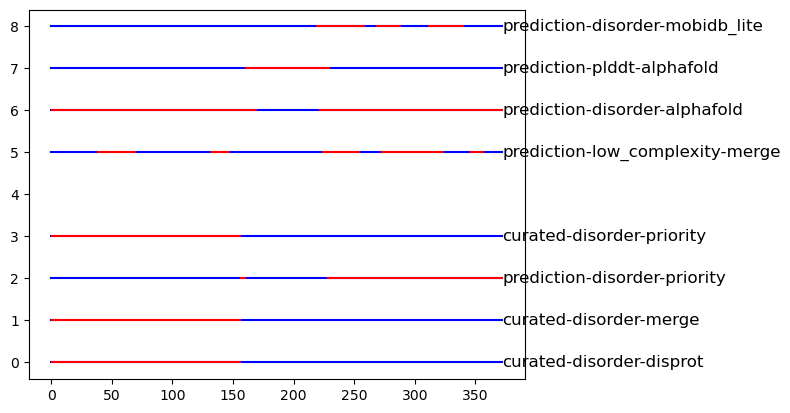

In [38]:
import matplotlib.pyplot as plt

#read json
with open("mobidb/P23441.json") as f:
    data = json.load(f)

L = data['length']
msa_entropy = ["homology-msa_entropy-psiblast","homology-msa_entropy-hhblits"]
disorder_keys = ["curated-disorder-disprot","curated-disorder-merge","prediction-disorder-alphafold","prediction-disorder-mobidb_lite"]
mykeys = ["curated-disorder-disprot","curated-disorder-merge","prediction-disorder-priority","curated-disorder-priority","curated-binding_mode_disorder_to_disorder-priority","prediction-low_complexity-merge","prediction-disorder-alphafold","prediction-plddt-alphafold","prediction-disorder-mobidb_lite"]
for i,k in enumerate(mykeys):
    if k in data:
        print(k, data[k])
        plt.plot([0, L], [i, i], color='blue')
        # for each key, if it contains a 'regions' key, then plot the regions in red, the rest in blue. The x-axis should be the of length L
        if 'regions' in data[k]:
            for region in data[k]['regions']:
                plt.plot([region[0], region[1]], [i, i], color='red')        
        # add a label to each line in the plot
        plt.text(L, i, k, fontsize=12, verticalalignment="center")
plt.show()
